**OPIM 5509: Introduction to Deep Learning - University of Connecticut**

Summary:

This script includes Data wrangling and regression modeling. This is about predicting Annual earnings using diverse geographical and demographic data. I used Random Forest Regressor for the model.


# Read the data

In [ ]:
!gdown 1qbAgaLscWcBe10dk70wpjCLVP_DRoUbT
!gdown 10XKm365yctlTkynRNQduPH1lojzgye6L

Downloading...
From: https://drive.google.com/uc?id=1qbAgaLscWcBe10dk70wpjCLVP_DRoUbT
To: /content/X_F23.csv
100% 312k/312k [00:00<00:00, 85.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=10XKm365yctlTkynRNQduPH1lojzgye6L
To: /content/y_F23.csv
100% 43.4k/43.4k [00:00<00:00, 44.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_df = pd.read_csv('X_F23.csv')
y_df = pd.read_csv('y_F23.csv')

# Explore the dataset
Get to know this new dataset! How many rows and columns are there? What are the data types of the columns in X (string vs numeric)? Are there any missing values?

In [ ]:
X_df.shape # 2351 rows and 10 columns

(2351, 10)

In [ ]:
y_df.shape # 2351 rows and 1 column

(2351, 1)

In [ ]:
X_df.info() # all of the columns are numeric, and all of them has missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      2170 non-null   float64
 1   Education                                  2172 non-null   float64
 2   Geography                                  2154 non-null   float64
 3   Age (normalized)                           2150 non-null   float64
 4   Career Advancement Opportunity Score       2172 non-null   float64
 5   Job Satisfaction Score                     2158 non-null   float64
 6   Health and Wellness Program Quality Score  2155 non-null   float64
 7   Job Demand Score                           2164 non-null   float64
 8   Work Experience (normalized)               2150 non-null   float64
 9   Company Size (normalized)                  2179 non-null   float64
dtypes: float64(10)
memory us

In [ ]:
X_df.isna().sum() # missing values per column

State                                        181
Education                                    179
Geography                                    197
Age (normalized)                             201
Career Advancement Opportunity Score         179
Job Satisfaction Score                       193
Health and Wellness Program Quality Score    196
Job Demand Score                             187
Work Experience (normalized)                 201
Company Size (normalized)                    172
dtype: int64

In [ ]:
y_df.info() # check the y dataset datatype as well. it is also numeric. no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Annual Earnings  2351 non-null   float64
dtypes: float64(1)
memory usage: 18.5 KB


In [ ]:
X_df.head(n=5)

,State,Education,Geography,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
0,1.0,1.0,1.0,0.865634,0.709601,1.060560,-0.792623,1.838437,-1.743695,-1.318409
1,1.0,2.0,1.0,-0.996528,0.155675,0.491878,-0.189500,-0.079065,NaN,0.323839
2,1.0,1.0,1.0,-1.245739,-1.142970,0.385317,NaN,0.153725,0.058209,0.214094
3,1.0,2.0,1.0,0.338473,-0.569361,-1.515115,-0.473107,-0.498192,2.690315,-1.736727
4,1.0,2.0,1.0,2.390648,-1.221736,1.511141,0.086787,-0.099528,0.148548,0.509818


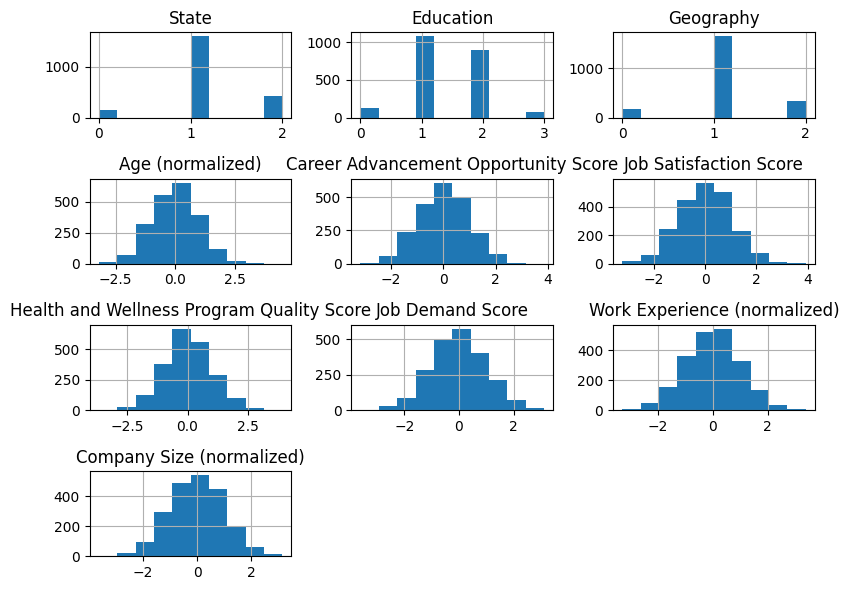

In [ ]:
X_df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

State, Education, and Geography are categorical, even if they are indicated as numeric. Also, the other columns are all normalized.

In [ ]:
y_df.head(n=5)

,Annual Earnings
0,1.092769e+06
1,2.461626e+06
2,4.297626e+05
3,6.147791e+04
4,1.752275e+06


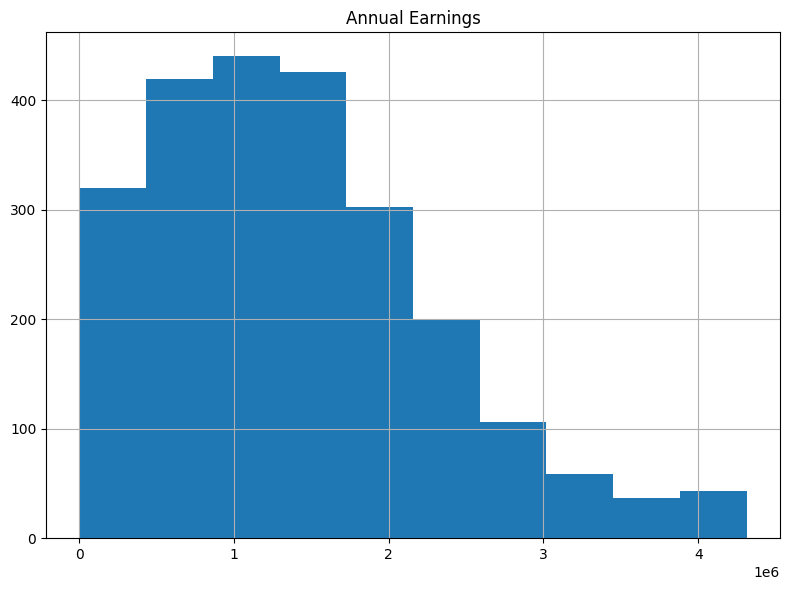

In [ ]:
y_df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

# Split into X_train, X_test, y_train, y_test.
Before we do any cleaning, let's split the data so that we can use fit_transform() on train and transform() on test. Use an 80/20 split, shuffle the data.  Print the shape of X_train, X_test, y_train, y_test and make sure it makes sense to you.

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X_df, y_df,
                                                     test_size = 0.2, # 80/20 split
                                                     shuffle = True,
                                                     random_state = 3058853 # chanju's student id
                                                     )

In [ ]:
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is (1880, 10)
The shape of X_test is (471, 10)
The shape of y_train is (1880, 1)
The shape of y_test is (471, 1)


# Clean up the dataset.
Right now X and y are in different files, so be careful if you are dropping rows.

In [ ]:
# explore missing values first
df_missing = X_df[X_df.isna().sum(axis=1) != 0]
df_missing
# 1325 rows out of 2351 rows in X dataset. quite a lot if I drop them all. imputing might be a better option.

,State,Education,Geography,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
1,1.0,2.0,1.0,-0.996528,0.155675,0.491878,-0.189500,-0.079065,NaN,0.323839
2,1.0,1.0,1.0,-1.245739,-1.142970,0.385317,NaN,0.153725,0.058209,0.214094
5,1.0,1.0,1.0,-1.211016,-0.576892,NaN,-1.661520,-0.384556,1.006293,-0.066080
7,1.0,2.0,1.0,0.553389,0.001326,-1.594756,NaN,-0.577921,0.881147,-0.845154
8,0.0,2.0,1.0,-1.336332,1.946698,NaN,-1.062700,-1.271544,-0.340270,-0.415450
...,...,...,...,...,...,...,...,...,...,...
2341,1.0,2.0,1.0,NaN,0.213091,-1.349172,NaN,-0.671498,-1.087030,0.825308
2343,1.0,1.0,1.0,NaN,-0.568062,-0.145568,0.572078,0.113021,-0.753121,NaN
2344,1.0,1.0,2.0,NaN,-0.158189,0.672453,-0.163278,-0.990426,1.164465,0.744229
2349,1.0,1.0,NaN,-1.124166,0.170485,-0.950153,-0.262840,NaN,-0.659495,1.178087


In [ ]:
# check the summary statistics
df_missing.describe()

,State,Education,Geography,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized)
count,1144.000000,1146.000000,1128.000000,1124.000000,1146.000000,1132.000000,1129.000000,1138.000000,1124.000000,1153.000000
mean,1.128497,1.429319,1.080674,-0.023727,0.030302,0.011126,0.010087,0.012587,-0.032760,-0.047101
std,0.486125,0.663966,0.468775,0.975317,0.983054,0.995478,0.999277,0.972319,1.020441,1.005977
min,0.000000,0.000000,0.000000,-3.199265,-3.176704,-3.232565,-3.688365,-3.601085,-3.094289,-3.635200
25%,1.000000,1.000000,1.000000,-0.691316,-0.612006,-0.685295,-0.646836,-0.627625,-0.718171,-0.746521
50%,1.000000,1.000000,1.000000,0.018750,0.055369,0.032328,-0.032019,-0.019474,-0.044375,-0.016568
75%,1.000000,2.000000,1.000000,0.600072,0.675679,0.672708,0.645183,0.643376,0.650798,0.645588
max,2.000000,3.000000,2.000000,4.479084,3.852731,3.926238,3.942331,2.942753,3.377768,3.152057


State, Education, and Geography are categorical in their nature even when it is seems like numeric. The other columns are all truly numeric, all of them normalized. when imputing missing values, mode should be used for State, Education and Geography columns.

In [ ]:
categorical_columns = ['State', 'Education', 'Geography'] # make a list of categorical columns to impute
numeric_columns = X_df.columns.difference(categorical_columns) # other than the categorical columns (numeric)

# Impute missing values with mode for categorical columns
for col in categorical_columns:
    mode_value_train = X_train[col].mode() # get the mode out of categorical columns.
    X_train[col].fillna(mode_value_train.iloc[0], inplace=True) # fill in the first mode of each column, in case there are more than one mode.
    mode_value_test = X_test[col].mode()
    X_test[col].fillna(mode_value_test.iloc[0], inplace=True)

# Impute missing values with mean for numeric columns
for col2 in numeric_columns:
    mean_value_train = X_train[col2].mean() # get the mean out of each numeric column.
    X_train[col2].fillna(mean_value_train, inplace=True) # fill in the numeric column with each column's mean.
    mean_value_test = X_test[col2].mean()
    X_test[col2].fillna(mean_value_test, inplace=True)

# check the dataframe and missing values
print(X_train.shape , '\n')
print(X_train.isna().sum(), '\n')
print(X_test.shape , '\n')
print(X_test.isna().sum())


(1880, 10) 

State                                        0
Education                                    0
Geography                                    0
Age (normalized)                             0
Career Advancement Opportunity Score         0
Job Satisfaction Score                       0
Health and Wellness Program Quality Score    0
Job Demand Score                             0
Work Experience (normalized)                 0
Company Size (normalized)                    0
dtype: int64 

(471, 10) 

State                                        0
Education                                    0
Geography                                    0
Age (normalized)                             0
Career Advancement Opportunity Score         0
Job Satisfaction Score                       0
Health and Wellness Program Quality Score    0
Job Demand Score                             0
Work Experience (normalized)                 0
Company Size (normalized)                    0
dtype: int64


# Make EDA plots and tables using X_train and y_train

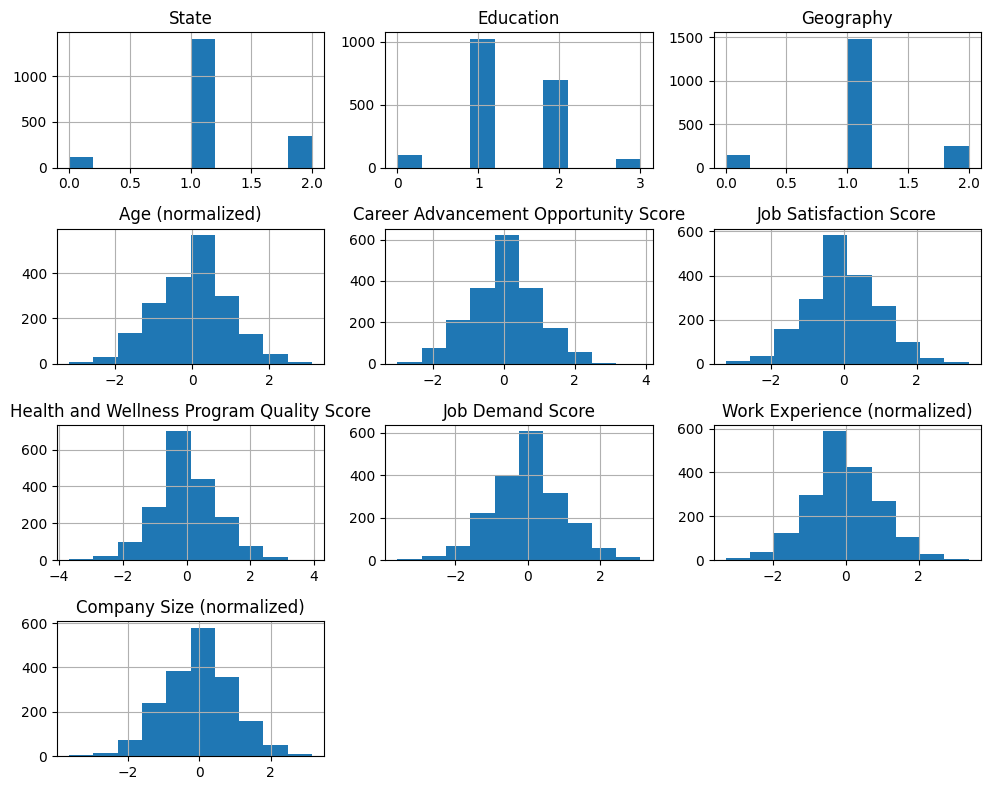

In [ ]:
# see distribution of X_train using histogram
X_train.hist(figsize=(10,8))
plt.tight_layout() # Adjust the padding between and around subplots
plt.show()

After imputing missing values, I see the categorical columns' (State, Education, and Geography) Y values in mode got higher and other numeric columns' Y values in mean got higher than before.

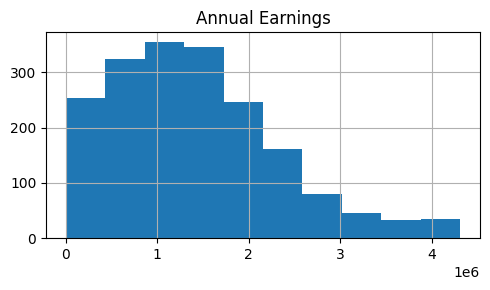

In [ ]:
# check distribution of y_train
y_train.hist(figsize=(5,3))
plt.tight_layout()
plt.show()

In [ ]:
# make a temporary dataset just to check correlation between features and target variable.
tmp = pd.concat([X_train, y_train], axis = 1) # axis = 1 mean concat based on columns.
tmp.head(n=5) # check if it is joined properly

,State,Education,Geography,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized),Annual Earnings
1481,1.0,1.0,1.0,-0.109610,-0.295480,-0.370011,0.006422,1.598647,0.560919,-0.034984,6.083091e+05
464,2.0,1.0,1.0,2.969510,0.442336,-0.796613,1.406808,0.000321,0.783660,-0.822868,1.883259e+06
129,1.0,1.0,1.0,0.032025,0.477879,-0.737618,0.391887,0.918805,-1.696583,-0.989378,7.129462e+05
20,1.0,2.0,2.0,-1.475613,0.363098,1.947304,1.063436,-1.537503,-0.010338,0.606150,2.145406e+06
1080,1.0,3.0,1.0,-1.108175,-0.856502,0.289784,0.907980,0.403940,-0.141242,0.646045,1.562962e+06


In [ ]:
tmp.info() # nice cool temporary training dataset with no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 1481 to 2181
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   State                                      1880 non-null   float64
 1   Education                                  1880 non-null   float64
 2   Geography                                  1880 non-null   float64
 3   Age (normalized)                           1880 non-null   float64
 4   Career Advancement Opportunity Score       1880 non-null   float64
 5   Job Satisfaction Score                     1880 non-null   float64
 6   Health and Wellness Program Quality Score  1880 non-null   float64
 7   Job Demand Score                           1880 non-null   float64
 8   Work Experience (normalized)               1880 non-null   float64
 9   Company Size (normalized)                  1880 non-null   float64
 10  Annual Earnings      

In [ ]:
# check summary statistics
tmp.describe()

,State,Education,Geography,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized),Annual Earnings
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000,1.880000e+03
mean,1.121809,1.388830,1.057979,-0.000511,0.019254,0.000411,0.025061,0.000321,-0.010338,-0.034984,1.414911e+06
std,0.483416,0.640468,0.455982,0.943876,0.931615,0.972718,0.952156,0.969682,0.955804,0.968516,9.003028e+05
min,0.000000,0.000000,0.000000,-3.199265,-3.010523,-3.232565,-3.688365,-3.601085,-3.295561,-3.635200,8.047435e+02
25%,1.000000,1.000000,1.000000,-0.622911,-0.564619,-0.619489,-0.539159,-0.622393,-0.614247,-0.666926,7.253851e+05
50%,1.000000,1.000000,1.000000,-0.000511,0.019254,0.000411,0.025061,0.000321,-0.010338,-0.034984,1.299692e+06
75%,1.000000,2.000000,1.000000,0.610982,0.628530,0.627339,0.573680,0.585135,0.590852,0.587508,1.920740e+06
max,2.000000,3.000000,2.000000,3.117681,3.852731,3.428910,3.942331,3.112910,3.377768,3.152057,4.312993e+06


In [ ]:
# check the correlation between features and target variable, Annual Earnings.
corr = tmp.corr(method='pearson') # linear correlation assuming variables are normally distributed and has linear realationship, range from -1 to 1.
corr.style.background_gradient(cmap='coolwarm') # I think this color map is the most intuitive.

,State,Education,Geography,Age (normalized),Career Advancement Opportunity Score,Job Satisfaction Score,Health and Wellness Program Quality Score,Job Demand Score,Work Experience (normalized),Company Size (normalized),Annual Earnings
State,1.000000,0.011960,-0.015155,0.010656,0.041572,0.015808,-0.004915,0.008769,0.019291,0.003210,0.136947
Education,0.011960,1.000000,0.002948,-0.018027,-0.025219,-0.013347,0.004664,-0.030642,-0.018024,-0.016688,-0.008264
Geography,-0.015155,0.002948,1.000000,-0.002057,0.020010,0.005966,0.029531,0.009634,0.000631,0.019066,0.112453
Age (normalized),0.010656,-0.018027,-0.002057,1.000000,0.020355,-0.018548,-0.013172,0.016368,0.024631,0.007458,0.125022
Career Advancement Opportunity Score,0.041572,-0.025219,0.020010,0.020355,1.000000,-0.018934,0.012386,-0.016806,0.024027,0.007765,-0.016098
Job Satisfaction Score,0.015808,-0.013347,0.005966,-0.018548,-0.018934,1.000000,0.007957,-0.027901,0.046785,0.003717,0.043450
Health and Wellness Program Quality Score,-0.004915,0.004664,0.029531,-0.013172,0.012386,0.007957,1.000000,-0.004175,0.017567,-0.001901,0.052325
Job Demand Score,0.008769,-0.030642,0.009634,0.016368,-0.016806,-0.027901,-0.004175,1.000000,-0.039865,-0.020398,-0.000221
Work Experience (normalized),0.019291,-0.018024,0.000631,0.024631,0.024027,0.046785,0.017567,-0.039865,1.000000,0.007809,0.028848
Company Size (normalized),0.003210,-0.016688,0.019066,0.007458,0.007765,0.003717,-0.001901,-0.020398,0.007809,1.000000,0.171737


Looking at the correaltion plot, this dataset tells me there is not much correlation with features and target variable, I can expect that model result would not be performing that great.

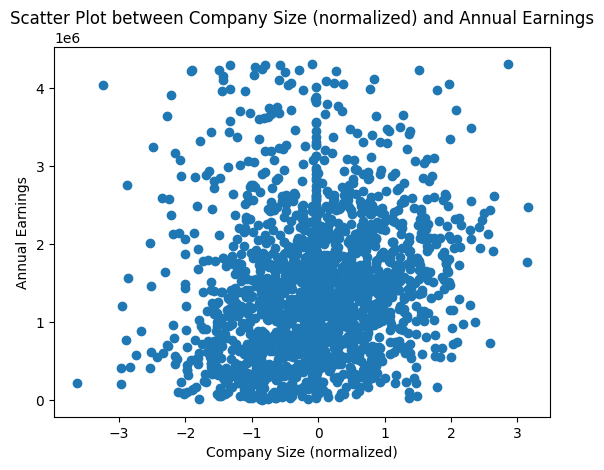

In [ ]:
# check the scatterplot of the highest feature importance with target variable.
plt.scatter(X_train['Company Size (normalized)'], y_train)
plt.xlabel('Company Size (normalized)')
plt.ylabel('Annual Earnings')
plt.title('Scatter Plot between Company Size (normalized) and Annual Earnings')
plt.show()

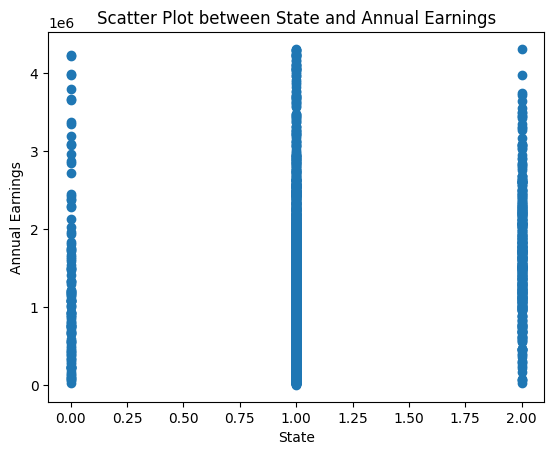

In [ ]:
# check the scatterplot of the second highest feature importance with target variable.
plt.scatter(X_train['State'], y_train)
plt.xlabel('State')
plt.ylabel('Annual Earnings')
plt.title('Scatter Plot between State and Annual Earnings')
plt.show()


# Subset columns for X


In [ ]:
X_train = X_train.drop(['State'], axis = 1)
X_test = X_test.drop(['State'], axis = 1)

In [ ]:
# sanity check
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 1481 to 2181
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Education                                  1880 non-null   float64
 1   Geography                                  1880 non-null   float64
 2   Age (normalized)                           1880 non-null   float64
 3   Career Advancement Opportunity Score       1880 non-null   float64
 4   Job Satisfaction Score                     1880 non-null   float64
 5   Health and Wellness Program Quality Score  1880 non-null   float64
 6   Job Demand Score                           1880 non-null   float64
 7   Work Experience (normalized)               1880 non-null   float64
 8   Company Size (normalized)                  1880 non-null   float64
dtypes: float64(9)
memory usage: 146.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47

# Use fit_transform() from StandardScaler() on X_train. Use transform() to apply that StandardScaler() to X_test.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# learn the range on train
X_train = scaler.fit_transform(X_train)
# apply to test
X_test = scaler.transform(X_test)

# Fit a random forest regressor model on X_train. Call your model object `clf`.

Then create two new variables, `train_preds` and `test_preds`, which are the predictions from your model. For example, you will use `train_preds = clf.predict(X_train)` for `X_train` . Calculate error metrics of MAE and R2 for train and test results.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# call model object clf
clf = RandomForestRegressor(n_estimators=10, random_state = 3058853) # prof. Wanik challenged me to use estimators = 10, setting the random state as my student ID to get the same result.

# fit the model
clf = clf.fit(X_train,y_train)

# store the predictions
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

<ipython-input-188-38c84f21ad88>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train,y_train)


In [ ]:
# import MAE and R2 score metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# R2
print("Train R2 is", r2_score(y_train, train_preds))
print("Test R2 is", r2_score(y_test, test_preds))

# MAE
print("Train MAE is", mean_absolute_error(y_train, train_preds))
print("Test MAE is", mean_absolute_error(y_test, test_preds))

Train R2 is 0.8195045814441675
Test R2 is 0.03996701856428153
Train MAE is 277680.51684307755
Test MAE is 709264.6336480888


# Make two scatterplots of actual vs. predicted. One for train results, one for test results.

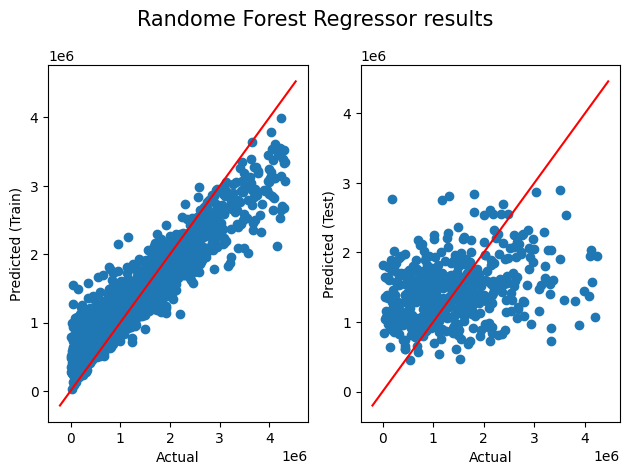

In [ ]:
# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns - two plots in one line

# make a title
fig.suptitle("Randome Forest Regressor results", fontsize=15)

# Train subplots
axes[0].scatter(x=y_train, y=train_preds) # axes[0] meaning first figure, x axis as acutual, y axis as predicted
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (Train)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Test subplots
axes[1].scatter(x=y_test, y=test_preds) # axes[1] means second figure, x axis as acutual, y axis as predicted
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (Test)",  fontsize=10)

# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

OMG! overfit a lot!

# Try a simple model - does it work?

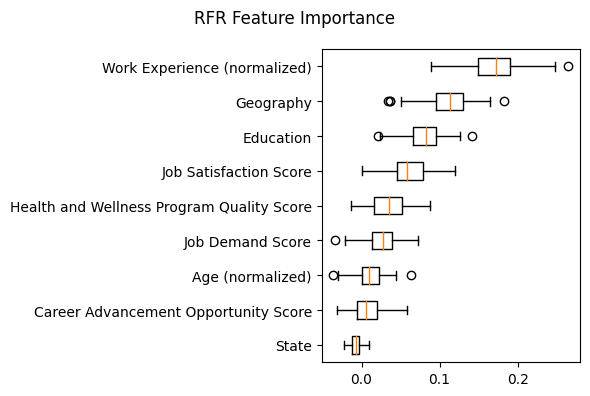

In [ ]:
# I already have initial model and result, only need to shuffle feature values
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=100, random_state=3058853) # 100 times of shuffling (quite robust), random state as my student ID. totally random!
perm_sorted_idx = result.importances_mean.argsort() # permutation importance calculation with mean, sorted in ascending order (lowest importance first highest importance last)

# see the plot of feature importance
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4)) # 1x1 grid, figure size 6X4
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False, # horizontal boxplot
            labels=X_df.columns[perm_sorted_idx])
fig.suptitle('RFR Feature Importance')
fig.tight_layout()
plt.show()

The top 5 features are Work Experience, Geography, Education, Job Satisfaction Score and Health and Wellness Program Quality Score.

In [ ]:
# now make a model based on the top 5 features.

# top 5 features
top5 = perm_sorted_idx[-5:] #since perm_sorted_idx is in ascending order, get the last 5 ones are the top 5 ones.

# Train a new Random Forest Regressor with the reduced feature set
simplified_X_train = pd.DataFrame(X_train[:, top5]) # X_train is numpy now, so make it dataframe again. X_train every rows and selected top 5 columns
simplified_X_test = pd.DataFrame(X_test[:, top5]) # same as X_test
clf_reduced = RandomForestRegressor(n_estimators = 10, random_state = 3058853)
clf_reduced.fit(simplified_X_train, y_train)

# store the predictions
train_preds_re = clf_reduced.predict(simplified_X_train)
test_preds_re = clf_reduced.predict(simplified_X_test)

# calculate performance metrics
# R2
print("Train R2 is", r2_score(y_train, train_preds_re))
print("Test R2 is", r2_score(y_test, test_preds_re))

# MAE
print("Train MAE is", mean_absolute_error(y_train, train_preds_re))
print("Test MAE is", mean_absolute_error(y_test, test_preds_re))

Train R2 is 0.8256155276400463
Test R2 is 0.035222587277572104
Train MAE is 271622.4008664331
Test MAE is 703222.5684174725


<ipython-input-192-2ed3b442548b>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_reduced.fit(simplified_X_train, y_train)


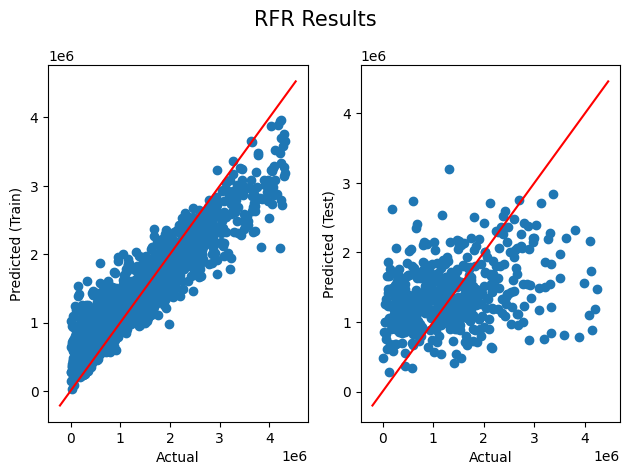

In [ ]:
# now visualize the results

# specify the dimensions
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# main title at the top
fig.suptitle("RFR Results", fontsize=15)

# first plot as train
axes[0].scatter(x=y_train, y=train_preds_re) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (Train)",  fontsize=10)

# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# second plot as test
axes[1].scatter(x=y_test, y=test_preds_re) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (Test)",  fontsize=10)

# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

# Five lessons learned

1. I could predict that the model result would not be great because there are not much correlations between features and the target variable. As visualized in EDA part, the highest correlation between the target variable was only 0.17. I could anticipate this model would overfit a lot.
2. Even if narrow down with top 5 important features, the model's performance didn't improve much. I suspect this is also due to low correlations between features.
3. When dealing with missing values, I need to think about two points: how much the missing value take up the whole dataset? and if I delete them, how can I also delete y values that are in separate dataset? The missing values in X dataset took about 50% and it was tricky to delete the corresponding y values so that I imputed missing values.
4. Be careful when imputing missing values. See the ditribution of the dataset first, identify which columns are truly numeric or categorical in their nature, and apply mode to categorical columns and mean to numeric columns. For numeric columns I could also use mode, but for the categorical columns I should use mode because their dataset is discrete, not continuous.
5. Playing with RFR parameters makes the model results different. I used n_estimators = 10 to compare the model's performances between original model and top5 features model. With n_estimators = 10, the top 5 model's performance was better than the original model whereas RFR default parameter's performance is reversed.
